# Network Analysis with igraph

### What can be represented with networks?

* Anything with nodes and edges
* Interactions on social networking applications (Facebook, Twitter, Instagram, etc.)
* Biology and ecology (ecosystems)
* Transportation: roads, railroad tracks, available flights
* Finance: stock markets, donors for campaigns, etc.
* The internet, as links and webpages


<div>
    <div style="display:inline-block">
        <h> Ecosystem </h>
        <img src="ecosystem.png"  height="500" width="300">
    </div>
    <div style="display:inline-block">
        <h> Social Network </h>
        <img src="social_graph_martingrandjean.png" height="500" width="300">
    </div>
        <div>
        <img src="railroad_lines.jpg">
    </div>
</div>

## Working with igraph

We begin by importing igraph, and then importing everything _from_ igraph - we'll use it enough that it's worth importing. 

In [70]:
import random
from igraph import *

## Basic Terminology

### Node/Vertex
Vertices are one of two basic building blocks of network graphs. They usually represent individual entities, such as people, accounts, specific locations, etc. For example, in social networks, a vertex could be one individual account.

### Edge
The second basic building block of network graphs are edges. They represent connections among vertices and can be weighted, directed, either, or neither. For example, in a network graph for an airline, an edge from one airport to another represents a direct flight that airline flies.

### Subgraph
Any subset of a larger graph is aptly called a subgraph. So, any specific group of nodes and edges that belong to a larger network. 

### Degree
Degree is the number of ties a node has to the rest of the community, so the number of edges extending to/from a single vertex. This property is specific to each vertex. For example, if you were looking at Facebook friendship connections, the degree of each vertex (assuming each vertex was one account) would be the number of friends that individual vertex had.

### Walk
A succession of edges going from vertex a to vertex b, where a can equal b (called a “closed” walk), is called a walk.

### Path
A path is a walk where every node and edge is different (no repeating or retracing steps). When you hear path, people are usually referring to the critical path, or the shortest path available. For example, if you were looking at a graph of trains and train stations, a path could represent all the trains you'd have to take to get from Cincinnati to Los Angeles. If you’re looking at a path where a=b, it is called a cycle - this could represent a round-trip airline ticket set.

### Shortest Path
When discussing paths in network analysis, we're mostly concerned with the _shortest_ path. That is, the path from one node to another that crosses the least number of edges (or, in a weighted graph, the path with the lowest weight). Counter-intuitive to the name, there can be many shortest paths for the same pair of vertices: if two paths have the same number of edges (or weights), they are _both_ considered shortest paths for that pair of vertices.

## What information can we study from networks?

### Size
Size refers to the number of edges in a graph. This is a good measure of how many connections exist within a certain graph.

### Order
Order is the number of vertices in a graph. This tells us how many individual nodes/people/accounts/etc we're studying in a given graph.

### Diameter
In network analysis, diameter refers to the longest of the shortest path lengths between pairs of vertices. So, if we were looking at a network graph of airports (with edges representing flights), the diameter would be the longest of the lengths of the flights between any two airports (e.g. Malaga, Spain to Auckland, New Zealand could represent the diameter of this network). 

Here, we look at a small graph we created by hand earlier. We had initialized it by adding a series of edges, and igraph built the vertex list accordingly. When we request a summary, we are given the number of nodes, the number of edges, and any attributes the vertices and edges have. Here, we've given each vertex a label, so we see "+ attr: label (v)" as part of our summary. Then, we ask for the diameter and are given 3. In context, this means that we'd have to cross a maximum of _3 edges_ to get from any one vertex to any other vertex. We then highlight a path whose length is the diameter.

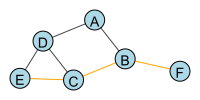

In [71]:
random.seed(9)
exp = Graph([(0,1),(1,2),(2,3),(3,0),(3,4),(2,4),(1,5)])
exp.vs["name"] = ["A","B","C","D","E","F"]
exp.es[1,5,6]['color'] = 'orange'
plot(exp, bbox=(200,100), vertex_color='Light blue',vertex_label=exp.vs["name"])

In [72]:

summary(exp) # -- <#nodes> <#edges> --
exp.diameter()

IGRAPH UN-- 6 7 -- 
+ attr: name (v), color (e)


3

---
Undirected vs. Directed Graphs 
---
### Undirected
* A to B is the same as B to A.
* Example: Friendships on Facebook. If someone is friends with me, I am also friends with them, and those friendships have the same meaning. So, when creating a network graph for who’s-friends-with-whom on Facebook, we would choose an undirected network graph.

Here, we look at a network of dolphin interactions and friendships. Any interaction between two dolphins is assumed to be a mutual friendship, so the edges are not directed. 

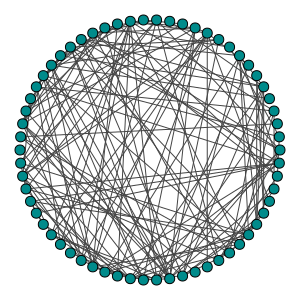

In [73]:
dolphins = read('dolphins/dolphins.gml')
#W. W. Zachary, An information flow model for conflict and fission in small groups, 
#Journal of Anthropological Research 33, 452-473 (1977)
layout = dolphins.layout_circle()
plot(dolphins, layout=layout, vertex_size=10, vertex_label=None, bbox=(300,300), vertex_color="Dark Cyan")

### Directed Graphs
* A to B is not the same as B to A because the direction has meaning
* Example: Twitter follow connections. If I follow someone, it does not mean that they also follow me - the connections are one-way. So, when creating a network graph for who-follows-whom on Twitter, we would want a directed network graph. 

Here, we look at an infrastructure network of a US Airline company.

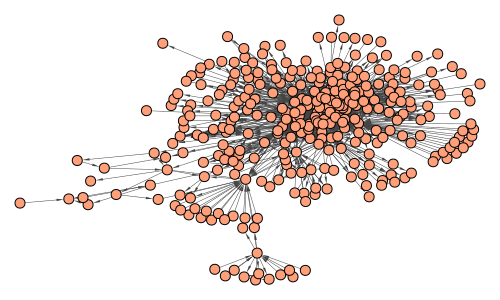

In [74]:
random.seed(28)
us_air=Graph.Read_Ncol("inf-USAir97/inf-USAir97.mtx") #note - delete beginning of file & cite here
us_air.vs["color"] = "Light Salmon"
plot(us_air, vertex_size=10, edge_width=.5, edge_arrow_size=.5, edge_arrow_width=.5, bbox=(500,300))

---
Unweighted vs. Weighted Graphs 
---

### Unweighted
* There is no measurement associated with edges; they simply represent a connection (or lack thereof).
* Example: modeling friendships, predator/prey relationships. The karate network below shows the network of friendships between the 34 members of a karate club at a US university; these connections are unweighted.


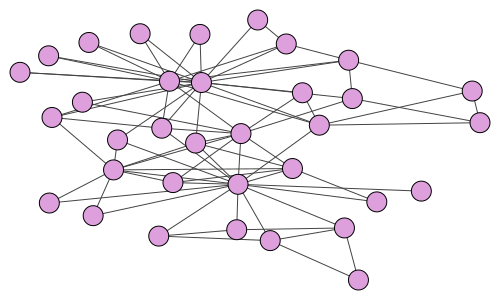

In [75]:
karate = read("karate/karate.gml") # W. W. Zachary, An information flow model for conflict and fission in small groups, 
#Journal of Anthropological Research 33, 452-473 (1977).
plot(karate,bbox=(500,300), vertex_color="Plum")

### Weighted
* In weighted graphs, there is a unit of measurement associated with each edge.
* Example: airline flights, where the unit of measurements is the duration of the flight in hours. Thus, longer flights have higher weights. If we were examining flight time, a weighted network graph could be a nice way to display flights from one location to another

In [76]:
#weighted graph
#astro = Graph.Read("astro-ph/astro-ph.gml") #M. E. J. Newman, Proc. Natl. Acad. Sci. USA 98, 404-409 (2001)
#astro.vs["label"] = None
#astro.vs["size"] = .25
#layout = astro.layout_drl()
#plot(astro, "testPlot.pdf", layout=layout, bbox=(500,300))

# Plotting

The true power of `igraph` lies in its more mathematical capabilities; however, it can still be used for plotting! It uses `cairo` to build its graphs and has a variety of attribute options for plotting nodes and edges.

Let's begin by creating a graph with our own data. Here, we model a sorority with attributes for name, year, major, and type of position within the sorority.

When creating graphs in igraph with cairo, the layouts are generated randomly. To make these graphs reproducable, we will set a seed before each graph is generated, creating a "controlled randomness" effect.

In [77]:
random.seed(123)

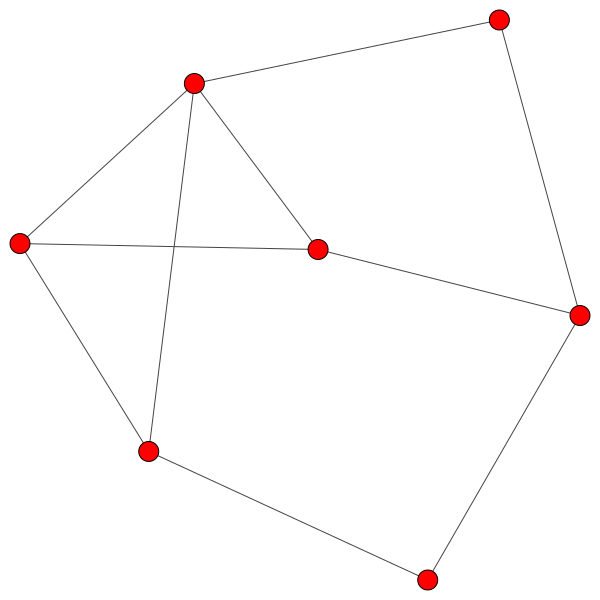

In [78]:
srat = Graph()
srat.add_vertices(["Estelle", "Erica", "Sydney", "Madison", "Emma", "Anna", "Jamie"])
srat.vs["major"] = ["MechE", "IOE", "IOE", "ChemE", "ChemE", "MechE", "IOE"]
srat.vs["year"] = [3,3,2,1,3,2,2]
srat.add_edges([(0,1), (0,2), (0,3), (2,3), (1,4), (2,4), (5,6), (4,5), (0,6),(6,3)])
plot(srat)

### Window Size, Node Size and Choosing a Color

This plot looks a little too big (and isn't very aesthetically pleasing). From here, we can set the size of the window using `bbox` and then change the colors of the vertices. The X11 color name list on Wikipedia shows all available colors - here, we use dark blue. Also, we can convey information through the size of the vertices. Since one of the attributes of each vertex is year (representing the student's year in school), we can assign larger sizes to students who have been in school longer. We do this by altering the `size` attribute of vertices.

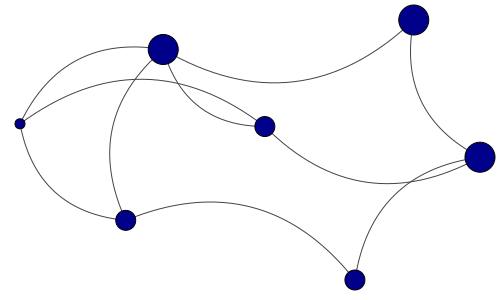

In [79]:
random.seed(123)
srat.vs()["size"] = [v*10 for v in srat.vs()["year"]]
plot(srat, bbox=(500,300), vertex_color="Dark Blue", edge_curved=True)

### Colors, Labels, and Argument Dictionaries

We can also shift the color of the vertices themselves to represent information. Since we have each vertex's major, we can color-code the vertices corresponding to each student's major. For instance, we could make MechE light blue, ChemE orange, and IOE maroon. We do this by filtering with a color dictionary.

Additionally, we'll add on the vertex labels, passing in the names of the vertices. Instead of having these labels show up on top of the nodes, we'll set the `vertex_label_dist` to 1. Finally, since our styling list is getting pretty long, we can build up a dictionary of all visual styles for our plot, and then pass that dictionary in as an argument to the plotting function.

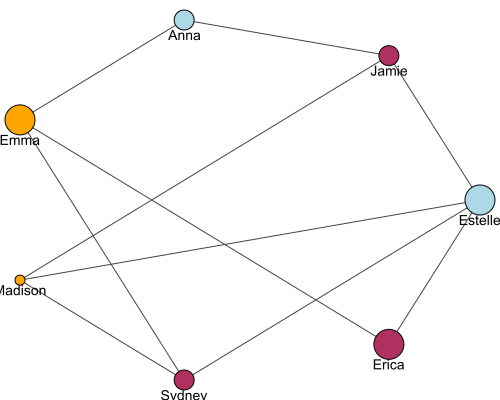

In [80]:
random.seed(123)
color_dict = {'MechE': 'light blue', 'ChemE': 'orange', 'IOE': 'maroon'}
vis = {}
vis["vertex_size"] = [v*10 for v in srat.vs()["year"]]
vis["vertex_color"] = [color_dict[maj] for maj in srat.vs["major"]]
vis["bbox"] = (500,400)
vis["vertex_label"] = srat.vs()['name']
vis["vertex_label_dist"] = 1
vis["layout"] = srat.layout_circle()
plot(srat, **vis)

### Edge Width

Though we haven't worked much with edge properties and weighted edges, `igraph` allows us to add attributes to edges just like vertices. Then, just like we did with vertices, we can change the size and color of the edges to demonstrate their respective weights. Here, we assign weights to the edges, as well as indicate the connections as either academic or not. We then graph their sizes and colors accordingly.

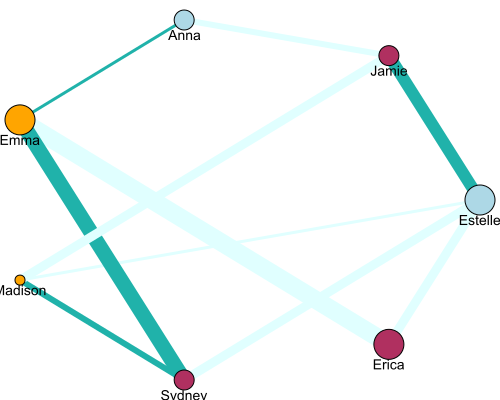

In [81]:
random.seed(123)
srat.es()['weight'] = [3,3,1,2,6,5,2,1,4]
srat.es()['is_academic'] = [True, True, True, False, True, False, True, False, False]
color_dict = {True: 'Light Cyan', False: 'Light Sea Green'}
vis['edge_width'] = [e*3 for e in srat.es()['weight']]
vis['edge_color'] = [color_dict[a] for a in srat.es()['is_academic']]
plot(srat, **vis)

### Saving Plots

Usually, when we make plots or charts, we want to export them to include them in a report, presentation, etc. Luckily, `igraph` has very simply built in the functionality to save these plots just by passing in a filename to the plot function. Currently, plots can be saved as SVG, PDF or PNG images.

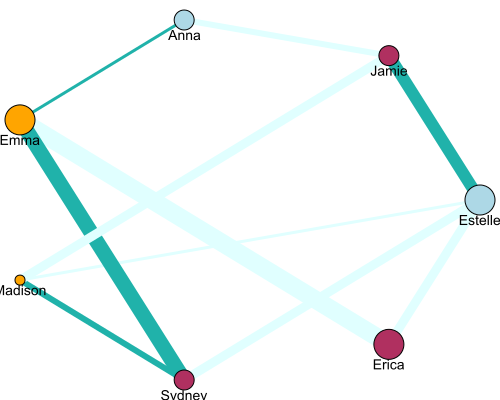

In [82]:
random.seed(123)
plot(srat, "srat.png", **vis)

## Exercise: Plotting

1. Create a graph (from scratch) that looks like a house (five nodes, six edges)
2. Create vertex labels
3. Create edge weights
4. Plot the graph with labels and varying edge widths (don't forget to set a seed!)
5. Change the color of the vertices or edges
6. Bonus points for curving the edges or for finding a seed to set the house straight up

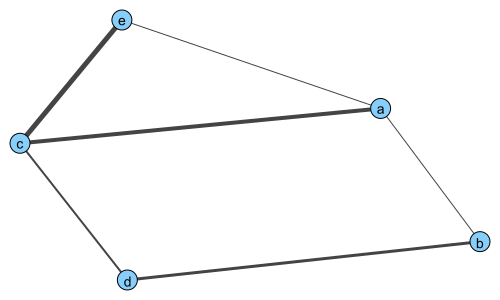

In [83]:
random.seed(2346)
g3 = Graph([(0,1),(2,3),(1,3),(0,2),(2,4),(0,4)])
g3.vs()['label'] = ['a', 'b','c','d','e']
g3.es()['weight'] = [1,2,3,4,5]
plot(g3, bbox=(500,300),vertex_label=g3.vs()['label'],edge_width=g3.es()['weight'], vertex_color="Light Sky Blue", edge_curved=False)

# Centrality

Measures of centrality aim to answer the question of “how important or central is one node to the network?”
This is an essential element of network analysis. When studying social networks, we often try to figure out who (or what account) is most important to some subgraph of the network, or even the network overall. This can provide significant insights as to who has social influence and how one person/account's actions can impact and guide entire social circles. In transportation analysis, centrality measures can be used to identify what should be the busiest stations/locations, and thus can aid in designing facilities that reflect customers' needs.

## Ways of Measuring Centrality

### Degree Centrality
Probably the simplest of all centrality measures, degree centrality assigns centrality measures to vertices based on their degree. Recall from earlier that degree is the number of edges (outgoing edges in directed graphs) from a vertex. Thus, degree centrality will assign the highest measure of centrality to the node with the most edges. In an network showing Facebook friendships, for instance, the person with the most friends would be the vertex with the highest level of degree centrality.

Here, we go back to the dolphin friendship network. If we change the node size to represent the degree of each vertex, we can highlight degree centrality in the graph.

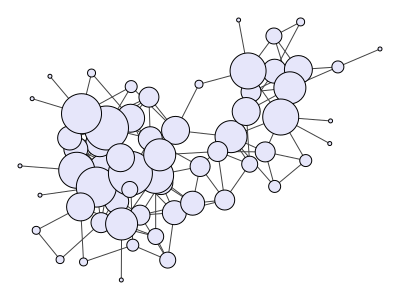

In [84]:
dolphins.degree()
dolphins.vs["size"] = [v*4 for v in dolphins.degree()] # 4 is an arbitrary multiplier for visualization
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Lavender", vertex_label=None)

### Closeness Centrality
The formal definition of closeness centrality is "the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.” In this case, the vertex with the _lowest_ closeness centrality is the most central vertex. When considering a network showing different train stations and railroad lines connecting them, a node with a high closeness centrality would be a station that provides relatively quick access to all other stations.

Note that taking distances to/from is the same for undirected graphs, but can produce very different results for directed graphs.

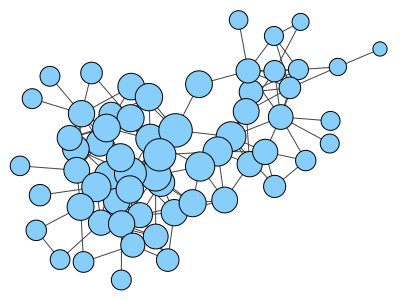

In [85]:
dolphins.vs["size"]=[v*80 for v in dolphins.closeness()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Sky Blue", vertex_label=None)

### Betweenness Centrality
Perhaps the more computationally complex of the centrality measures listed here, betweenness centrality looks at every pair of vertices, computes the ratio of shortest paths passing through the vertex in question to all shortest paths, and sums these ratios. The algorithm looks like this:

\begin{equation*}
g(v) = \sum_{s\neq v \neq t} \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

    1) For each pair of vertices (s, t), compute the shortest paths between them. 
    2) For each pair of vertices (s, t), determine the fraction of shortest paths that pass through the vertex in question (here, vertex v). 
    3) Sum this fraction over all pairs of vertices (s, t)
 

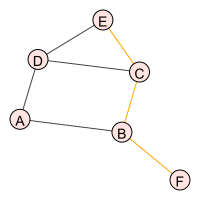

In [86]:
random.seed(30)
exp.vs["label"] = ['A','B','C','D','E','F']
plot(exp, bbox=(200,200), vertex_color="Misty Rose")

Let's walk thorugh calculating the betweenness centrality measure for *C*.

In [87]:
exp.betweenness()

[1.0, 4.5, 3.0, 1.5, 0.0, 0.0]

As we've done with the other measures of centrality, let's change the size of the vertices in the dolphin network to represent each vertex's betweenness centrality measure.

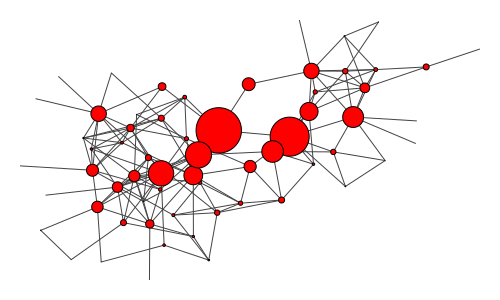

In [88]:
dolphins.vs["size"] = [v/10 for v in dolphins.betweenness()]
random.seed(35)
plot(dolphins, bbox=(500,300), vertex_label=None)

In [89]:
dolphins.vs[dolphins.betweenness().index(max(dolphins.betweenness()))]

igraph.Vertex(<igraph.Graph object at 0x00000000055B4C78>, 36, {'size': 45.42740687329566, 'id': 36.0, 'label': 'SN100'})

# PageRank

Think of the internet as one massive directed graph, where each page is a vertex, and a link from one page to another is an edge. Pagerank is the probability of a user ending up on a certain page.


\begin{equation*}
\frac{1-d}{N} + d*\sum_{i=1} \frac{PR(I_i)}{C(I_i)}
\end{equation*}

Where d is a damping factor (usually 0.85), N is the number of vertices in the network, C(Ii) represents the number of outgoing edges (links) from vertex Ii, and PR(Ii) represents the pagerank of vertex  Ii

Computed iteratively: initialize every vertex’s pagerank to 1/N

### Example
Let's go back to the sample graph we used to calculate betweenness centrality and use igraph to calculate its pagerank.

In [90]:
exp.pagerank()

[0.14478497471285479,
 0.21836230785869368,
 0.2046697804579824,
 0.2044081911278526,
 0.14090542528265323,
 0.08686932055996321]

Since pagerank can be used as a measure of importance, we look at the dolphin network and change each vertex's size (again) to represent the pagerank score of each individual dolphin. Thus, the graph highlights centrality using pagerank.

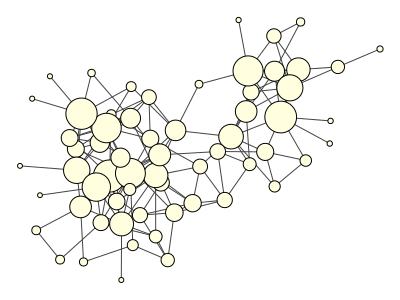

In [91]:
dolphins.vs["size"]=[v*1000 for v in dolphins.pagerank()]
random.seed(35)
plot(dolphins, bbox=(400,300), vertex_color="Light Yellow", vertex_label=None)

# Shortest Path Calculations
There are a number of methods of calculating the shortest path between two (or more) vertices. In computer science, this is often referred to as the "traveling salesman problem" and is considered NP-hard. `igraph` has built-in methods for finding the shortest path. The (arguably) most popular of these methods is Dijkstra's algorithm (see Appendix for more information and the mathematical formulas).

### Example

The `shortest_paths_dijkstra` method takes in a source and a target, both of which are (lists of) nodes to be considered when calculating the shortest path lengths. Consider the karate club network we looked at earlier. If I want to know the shortest path length (or number of people/connections) from person 5 to person 8, I can pass those in as sources and targets. The function will return the shortest path length for the given vertices in a list of lists.

In [103]:
karate.shortest_paths_dijkstra(5, 29)

[[4]]

Alternatively, if we wanted to know the actual vertices we'd have to cross through and edges we'd have to follow, we can use the method `get_all_shortest_paths` and receive a list of all the different paths we could take. For instance, in our karate graph, we can look at the shortest paths from 5 to 29. We know that the length will be four, but there may be more than one four-edge path to get from 5 to 29. Hence, if we ask for all the shortest paths, more than one list may be returned.

In [100]:
karate.get_all_shortest_paths(5, 29)

[[5, 0, 8, 33, 29],
 [5, 0, 13, 33, 29],
 [5, 0, 19, 33, 29],
 [5, 0, 31, 33, 29],
 [5, 0, 2, 32, 29],
 [5, 0, 8, 32, 29],
 [5, 0, 31, 32, 29]]

We can also get _all_ shortest paths from one node to all other nodes. So, in our karate graph we can look at all the shortest paths from person 5 to everyone else they have a path to.

In [94]:
karate.get_all_shortest_paths(5)

[[5, 0],
 [5, 0, 1],
 [5, 0, 2],
 [5, 0, 3],
 [5, 10, 4],
 [5, 6, 4],
 [5, 0, 4],
 [5],
 [5, 6],
 [5, 0, 7],
 [5, 0, 8],
 [5, 0, 2, 9],
 [5, 10],
 [5, 0, 11],
 [5, 0, 12],
 [5, 0, 13],
 [5, 0, 8, 33, 14],
 [5, 0, 13, 33, 14],
 [5, 0, 19, 33, 14],
 [5, 0, 31, 33, 14],
 [5, 0, 2, 32, 14],
 [5, 0, 8, 32, 14],
 [5, 0, 31, 32, 14],
 [5, 0, 8, 33, 15],
 [5, 0, 13, 33, 15],
 [5, 0, 19, 33, 15],
 [5, 0, 31, 33, 15],
 [5, 0, 2, 32, 15],
 [5, 0, 8, 32, 15],
 [5, 0, 31, 32, 15],
 [5, 16],
 [5, 0, 17],
 [5, 0, 8, 33, 18],
 [5, 0, 13, 33, 18],
 [5, 0, 19, 33, 18],
 [5, 0, 31, 33, 18],
 [5, 0, 2, 32, 18],
 [5, 0, 8, 32, 18],
 [5, 0, 31, 32, 18],
 [5, 0, 19],
 [5, 0, 8, 33, 20],
 [5, 0, 13, 33, 20],
 [5, 0, 19, 33, 20],
 [5, 0, 31, 33, 20],
 [5, 0, 2, 32, 20],
 [5, 0, 8, 32, 20],
 [5, 0, 31, 32, 20],
 [5, 0, 21],
 [5, 0, 8, 33, 22],
 [5, 0, 13, 33, 22],
 [5, 0, 19, 33, 22],
 [5, 0, 31, 33, 22],
 [5, 0, 2, 32, 22],
 [5, 0, 8, 32, 22],
 [5, 0, 31, 32, 22],
 [5, 0, 31, 25, 23],
 [5, 0, 8, 33, 23],
 [5, 

# Community Detection

Community detection is exactly what it sounds like: finding clusters of nodes (communities) that are densly connected to one another, or at least more densly connected to one another than to the rest of the graph. This is especially common in social network analysis, as it can indicate where friend groups lie, what brings them together (by looking at their attributes), and how they differ from the rest of the graph. It can highlight communities and clusters that otherwise wouldn't be apparent.

### Infomap Community Detection

`igraph` describes the InfoMap algorithm as finding the community structure that minimizes the expected description length of a random walker trajectory. In other words, it builds communities based on which sub-graphs and clusters would minimize the expected length of any random path or walk.

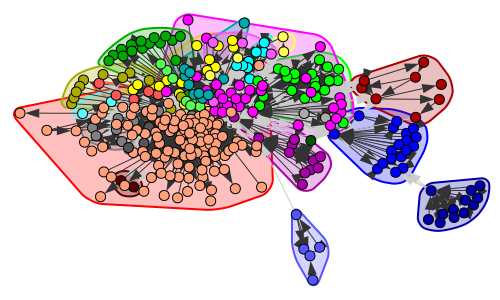

In [104]:
random.seed(50)
comms = us_air.community_infomap()
plot(comms, mark_groups=True, vertex_label=None, vertex_size=10, arrow_head_width=2, bbox=(500,300))

### Edge Betweenness and Clustering

Earlier, we looked at edge betweeennness as a measure of centrality. Remember that when you calcuate betweenness centrality, you tend to end up with a few edges having really high values - these are the ones that are responsible for many connections in the graph, and often bridge smaller sub-graphs together. The Girvan-Newman algorithm (for edge-betweenness community detection)works by removing thesee high-valued edges to separate these smaller groups and thus reveal the underlying graph structure. It loops through the following steps:
1. The betweenness of all existing edges in the network is calculated first.
2. The edge with the highest betweenness is removed. 
3. The betweenness of all edges affected by the removal is recalculated.
4. Steps 2 and 3 are repeated until no edges remain.

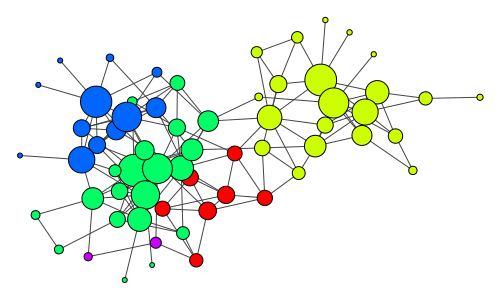

In [105]:
random.seed(50)
g = dolphins
c_edges = g.community_edge_betweenness()
clusters = c_edges.as_clustering()
members = clusters.membership
colors = RainbowPalette(n=int(max(members) + 1))
g.vs["color"] = [(colors.get(i)) for i in members]
plot(g, bbox=(500,300), vertex_label=None)

# Adjacency Matrices

An adjanceny matrix is a square (n by n) matrix used to represent nodess and edges in a network graph. For unweighted, undirected networks, the values in the matrix are all either 0 or 1, where 1 represents an edge existing between the two vertices and a 0 representing no edge. In simple graphs, the diagonal is filled with 0's, meaning that no vertex is connected to itself. A vertex connected to itself is called a _loop_.

Let's look at an adjacency matrix of our example graph from earlier:

In [106]:
mat = exp.get_adjacency()
print(mat)

[[0, 1, 0, 1, 0, 0]
 [1, 0, 1, 0, 0, 1]
 [0, 1, 0, 1, 1, 0]
 [1, 0, 1, 0, 1, 0]
 [0, 0, 1, 1, 0, 0]
 [0, 1, 0, 0, 0, 0]]


We see that this graph is not self-connected, since the diagonal contains all 0's.

From here, we often want to save the adjacency matrix so we can work with it in other frameworks. We could easily convert it to a numpy array by running ```mat_np = np.array(mat.data) ```, or we can save the matrix to our computer for later use:

In [29]:
exp.write_adjacency("exp_adj.txt")

# NetworkX vs. igraph

When looking to explore network analysis for the first time, it's common to work with the `NetworkX` package for python. `igraph` has a steeper learning curve and is a little less user friendly; however, when working with large datasets (especially for community detection), the computational speed of `igraph` far surpasses that of `NetworkX`.

https://yoyoinwanderland.github.io/2017/08/08/Community-Detection-in-Python/

